# Confusion Matrix
---
- from your scratch

- from scikit-learn package

- Ref: [![Confusion Matrix in the wiki page](https://img.shields.io/badge/Confusion_Matrix_in_the_wiki_page-green.svg)](https://en.wikipedia.org/wiki/Confusion_matrix)
- Ref: [![Confusion Matrix in Scikit-Learn](https://img.shields.io/badge/Confusion_Matrix_in_Scikit_Learn-green.svg)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) 

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Make Random Prediction:

In [75]:
truth_label = np.concatenate((np.full(20, 0), np.full(20, 1))) # 0 means True, 1 means False
prediction = np.random.rand(40,2)


# From Your scratch

true positives:  9, false positives:  7
false negatives: 11, true negatives: 13


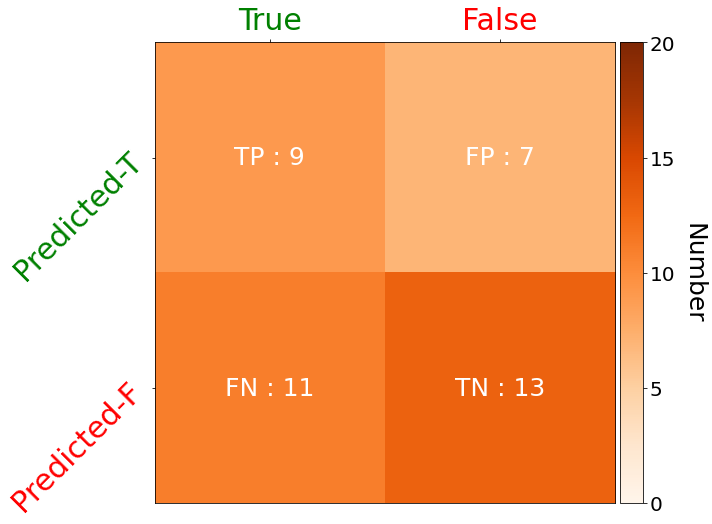

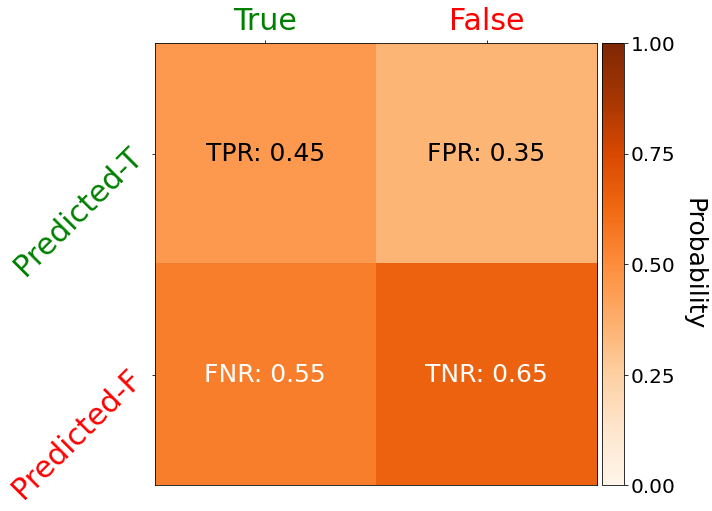

In [91]:
total_data = pd.DataFrame({"truth_label": truth_label,
                           "prediction_axix_0" : prediction[:,0],
                           "prediction_axix_1" : prediction[:,1],
                           "argmax" : np.argmax(prediction,axis=1)  # np.argmax can pick the maximum value in this vector.
                          })

TP = len(total_data[(total_data["truth_label"] == 0) & (total_data["argmax"] == 0)])
FP = len(total_data[(total_data["truth_label"] == 1) & (total_data["argmax"] == 0)])
FN = len(total_data[(total_data["truth_label"] == 0) & (total_data["argmax"] == 1)])
TN = len(total_data[(total_data["truth_label"] == 1) & (total_data["argmax"] == 1)])


print("true positives: {:2.0f}, false positives: {:2.0f}".format(TP,FP))
print("false negatives: {:2.0f}, true negatives: {:2.0f}".format(FN,TN))

confusion = np.array([[TP,FP],[FN,TN]]) # follow convention in the wiki page.

ratio = np.zeros(4)
k = 0
for i in range(2):
    for j in range(2):
        ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
        k += 1
        
confusion_ = np.array([[ ratio[0],ratio[2]],
                       [ ratio[1],ratio[3]]])/100.

##########################################################################

s = len(truelist)
f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = ax.imshow(confusion, cmap="Oranges", origin= "upper", vmin=0, vmax=20)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Number", rotation=270, fontsize=25, labelpad=30, y=0.5)
cbar.set_ticks([0,5,10,15,20])
cbar.ax.set_yticklabels(["0","5","10","15","20"])

ax.set_xticks(range(confusion.shape[1]))
ax.set_xticklabels(truelist, fontsize=30, rotation=0)
ax.set_yticks(range(confusion.shape[1]))
ax.set_yticklabels(likelist, fontsize=30, rotation=45)

my_colors = ["green","red"]
ax.xaxis.tick_top()
for ticklabel, tickcolor in zip(ax.get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(ax.get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TP","FP"],["FN","TN"]])
    
for (i, j), z in np.ndenumerate(confusion):
    ax.text(j, i, '{:^3s}: {:0.0f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=25,color=colors)
    
plt.tight_layout()
plt.show()


##########################################################################


f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = ax.imshow(confusion_, cmap="Oranges", origin= "upper",vmin=0, vmax=1)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Probability", rotation=270, fontsize=25, labelpad=30, y=0.5)
cbar.set_ticks([0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(["0.00","0.25","0.50","0.75","1.00"])
#, fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right"


ax.set_xticks(range(confusion_.shape[1]))
ax.set_xticklabels(truelist, fontsize=30, rotation=0)
ax.set_yticks(range(confusion_.shape[1]))
ax.set_yticklabels(likelist, fontsize=30, rotation=45)

my_colors = ["green","red"]
ax.xaxis.tick_top()
for ticklabel, tickcolor in zip(ax.get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(ax.get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TPR","FPR"],["FNR","TNR"]])
    
for (i, j), z in np.ndenumerate(confusion_):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    ax.text(j, i, '{:^3s}: {:0.2f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=25,color=colors)
    
plt.tight_layout()
plt.show()

# From Scikit-learn Package

Raw Confusion Matrix (scikit-learn):
Confusion matrix whose i-th row and j-th column entry indicates the number of samples with
true label being i-th class and predicted label being j-th class.
[[true positives, false negatives]
[false positives, true negatives]]
[[ 9 11]
 [ 7 13]]




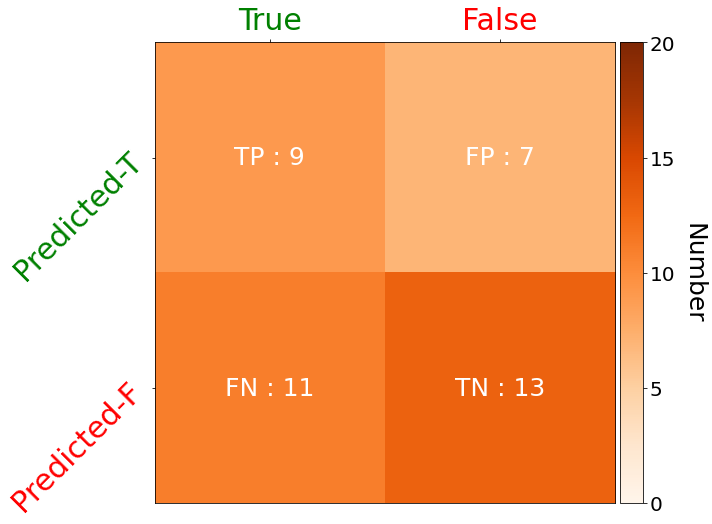

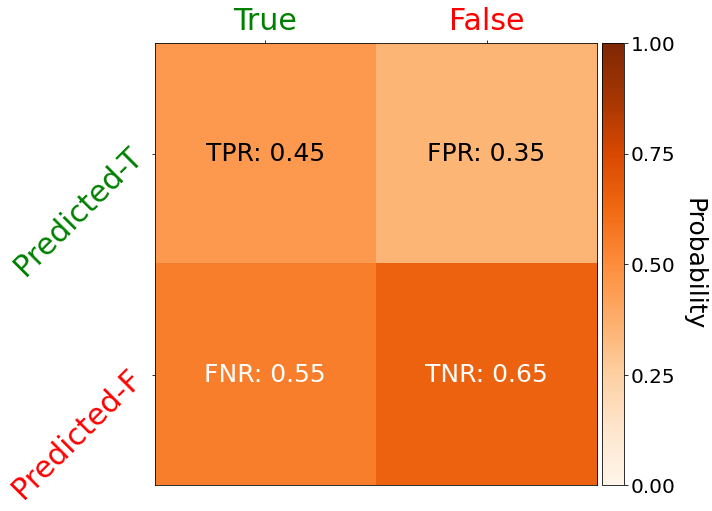

In [93]:
confusion = confusion_matrix(truth_label, np.argmax(prediction,axis=1))

print("Raw Confusion Matrix (scikit-learn):")
print("Confusion matrix whose i-th row and j-th column entry indicates the number of samples with")
print("true label being i-th class and predicted label being j-th class.")
print("[[true positives, false negatives]")
print("[false positives, true negatives]]")
print(confusion)
print("\n")

ratio = np.zeros(4)
k = 0
for i in range(2):
    for j in range(2):
        ratio[k] = (confusion[j][i]/np.sum(confusion,axis=1)[i])*100.
        k += 1
        
confusion_ = np.array([[ ratio[0],ratio[1]],
                       [ ratio[2],ratio[3]]])/100.

truelist = ["True","False"]
likelist = ["Predicted-T","Predicted-F"]

##########################################################################

s = len(truelist)
f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = ax.imshow(confusion.T, cmap="Oranges", origin= "upper", vmin=0, vmax=20)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Number", rotation=270, fontsize=25, labelpad=30, y=0.5)
cbar.set_ticks([0,5,10,15,20])
cbar.ax.set_yticklabels(["0","5","10","15","20"])

ax.set_xticks(range((confusion.T).shape[1]))
ax.set_xticklabels(truelist, fontsize=30, rotation=0)
ax.set_yticks(range((confusion.T).shape[1]))
ax.set_yticklabels(likelist, fontsize=30, rotation=45)

my_colors = ["green","red"]
ax.xaxis.tick_top()
for ticklabel, tickcolor in zip(ax.get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(ax.get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TP","FP"],["FN","TN"]])
    
for (i, j), z in np.ndenumerate(confusion.T):
    ax.text(j, i, '{:^3s}: {:0.0f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=25,color=colors)
    
plt.tight_layout()
plt.show()


##########################################################################


f, ax = plt.subplots(1,1, figsize=(s+8, s+8))

aa = ax.imshow(confusion_, cmap="Oranges", origin= "upper",vmin=0, vmax=1)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="1%")
cbar = plt.colorbar(aa, cax=cax)
cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(6))
cbar.set_label("Probability", rotation=270, fontsize=25, labelpad=30, y=0.5)
cbar.set_ticks([0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(["0.00","0.25","0.50","0.75","1.00"])
#, fontsize=25, rotation=0, verticalalignment='center', horizontalalignment="right"


ax.set_xticks(range(confusion_.shape[1]))
ax.set_xticklabels(truelist, fontsize=30, rotation=0)
ax.set_yticks(range(confusion_.shape[1]))
ax.set_yticklabels(likelist, fontsize=30, rotation=45)

my_colors = ["green","red"]
ax.xaxis.tick_top()
for ticklabel, tickcolor in zip(ax.get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
    
for ticklabel, tickcolor in zip(ax.get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

Terminology = np.array([["TPR","FPR"],["FNR","TNR"]])
    
for (i, j), z in np.ndenumerate(confusion_):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    ax.text(j, i, '{:^3s}: {:0.2f}'.format(Terminology[i,j],z), ha='center', va='center',fontsize=25,color=colors)
    
plt.tight_layout()
plt.show()